<h1><center><span style = 'color:green'><b>THE SPARKS FOUNDATION<b></span></center></h1>

<h2><center>Data Science and Business Analytics Task</center></h2>

<h4 style='text-align: right;'>NAME: <span style = 'color:green'>SHUBHAM KUMAR</span><h4>

### **TASK2 - Prediction using Unsupervised Learning**

### **DATA AUDIT**

**Importing Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

**Displaying Raw Dataset**

In [2]:
data = pd.read_csv("Iris.csv")
data = pd.DataFrame(data)
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


**First Five Row of the Dataset**

In [3]:
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Last Five Row of the Dataset**

In [4]:
data.tail(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


**Shape of The Dataset**

In [5]:
data.shape

(150, 6)

**Column present in the Dataset**

In [6]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

**Summary of the Dataset**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


**Checking Datatypes**

In [10]:
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

**Checking Missing values**

In [11]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**No Missing Values**

### **CORRELATION**

In [12]:
data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


**As this is on Unsupervised Learning we can take features and neglect other columns**

In [13]:
data = data.drop(columns=['Id','Species'])
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


**Predict the optimum number of Clusters**

***Create X***

In [14]:
X = data.iloc[:, :-1].values

***Create Y***

## **Elbow Method**

***In the Elbow method, we are actually varying the number of clusters (K) from 1 - 10***

***For each value of K, we are calculating WCSS(Within-Cluster Sum of Square)***

***WCSS is the sum of squared distance between each point and the centroid in a cluster***

***When we plot the WCSS with the K Value, the plot look like an Elbow***

***When we analyze the graph we can see that the graph will rapidly change at a point and thus creating an elbow shape. The K value corresponding to this point is the optimal K value or an optimal number of clusters***

In [16]:
#For creating y we need no of cluster. And we can find optimum number of cluster using elbow method

In [19]:
clusterSumofSquares = []
clusterRange = range(1,11)
for i in clusterRange:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    clusterSumofSquares.append(kmeans.inertia_)

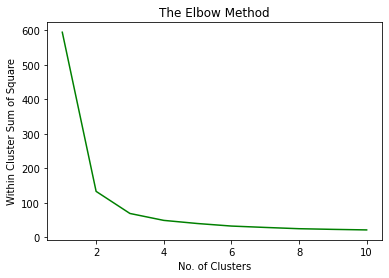

In [20]:
plt.plot(clusterRange,clusterSumofSquares,color="green")
plt.title("The Elbow Method")
plt.xlabel("No. of Clusters")
plt.ylabel("Within Cluster Sum of Square")
plt.show()

***The Point which Elbow shape created is 3. Therefore the optimal number of cluster is 3.***

### **K-Means Clustering**

In [21]:
y = KMeans(n_clusters = 3)

***Fit Kmeans cluster model***

In [22]:
y_kmean = y.fit_predict(X)

### **Visualization of Results**

***Compare our original data vs clustered results***

Text(0.5, 1.0, 'Predicted')

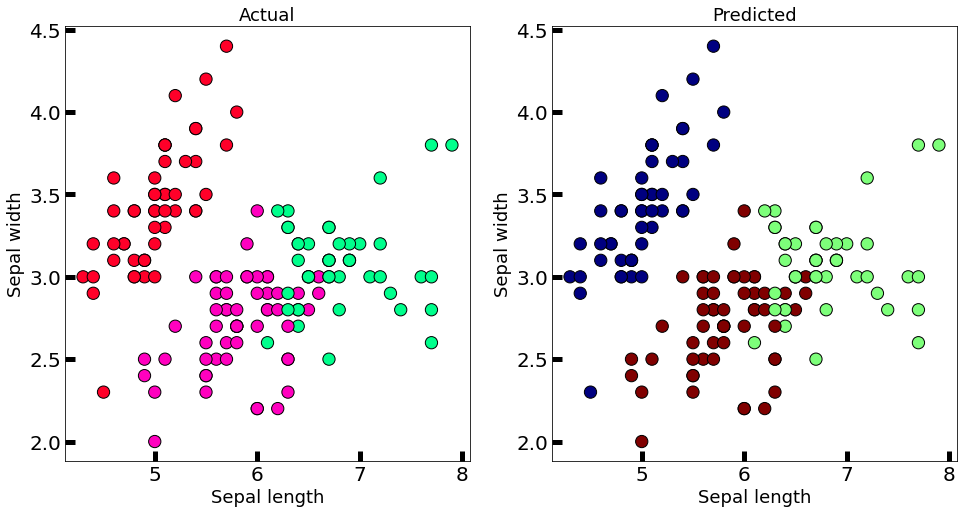

In [23]:
new_labels = y.labels_
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:, 0], X[:, 1], c=y_kmean, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='jet',
edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)